In [208]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy
import glob
import numpy as np

In [7]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)

In [8]:
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

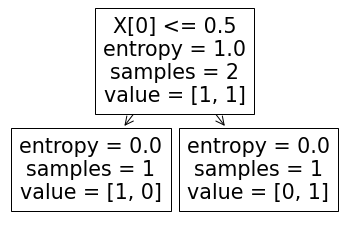

In [9]:
tree.plot_tree(clf)

In [232]:
stat_files = glob.glob("/home/seif/Documents/CS293N/project/pinot_minion_tasks/seif_data/youtube_data/*_stats.json")
stat_files.extend(glob.glob("/home/seif/Documents/CS293N/project/pinot_minion_tasks/jaber_data/youtube_data/*_stats.json"))
summary_stats = []
window_stats = []
for file in stat_files:
    with open(file, 'r') as f:
        stat = json.loads(f.read())
        for window_stat in stat['window']:
            window_stats.append(pd.json_normalize({'window':window_stat}, sep='_').to_dict(orient='records')[0])
        del stat['window']
        summary_stats.append(pd.json_normalize(stat, sep='_').to_dict(orient='records')[0])

In [256]:
summary = pd.DataFrame(summary_stats).to_dict(orient="list")
window = pd.DataFrame(window_stats).to_dict(orient="list")
#stats = {**summary, **window}
stats = {**summary, **window}
stats.keys()
stats

{'summary_network_upstream_bytes_per_packet_mean': [90.38257357184074,
  131.0406976744186,
  152.75567665758402,
  138.9272097053726,
  95.2910128388017,
  84.31800887761572,
  96.83752357008171,
  85.22607578676943,
  96.66130884041331,
  102.73289760348584,
  99.27097966728282,
  116.60197368421052,
  142.9111549851925,
  100.23670212765957,
  152.47853309481218,
  92.80833606826387,
  129.56778964667214,
  135.26576576576576,
  100.98991121872477,
  149.54105263157894,
  158.91539245667687,
  98.91951861602107,
  89.85728779168076,
  127.9889152810768,
  150.925,
  127.82485875706215,
  91.35647216633132,
  122.19412288512912,
  101.20378232342725,
  151.88846153846154,
  85.03983286908078,
  135.7289972899729,
  110.52938295788442,
  138.0995951417004,
  136.86059479553904,
  138.39256572982774,
  102.37816455696202,
  88.4024024024024,
  162.7539766702015,
  130.13110749185668,
  133.5,
  105.06979062811565,
  105.49268292682927,
  90.78819145887074,
  94.81616871704745,
  98.171

(14.308884967403856, 13.61573778684391, 10.53410732330099, 9.840960142741045, 8.178785061317985, 7.30727539786245, 6.536094322253661, 5.800338535006286, 4.8303639522069775, 4.416720705478702)


/home/seif/Documents/CS293N/project/pinot_minion_tasks/env/lib/python3.10/site-packages/scipy/stats/_entropy.py:321: RuntimeWarning: divide by zero encountered in log
  logs = np.log(n * differences / (ci * m))
/home/seif/Documents/CS293N/project/pinot_minion_tasks/env/lib/python3.10/site-packages/scipy/stats/_entropy.py:293: RuntimeWarning: divide by zero encountered in log
  logs = np.log(n/(2*m) * differences)


Text(0.5, 1.0, 'Entropy')

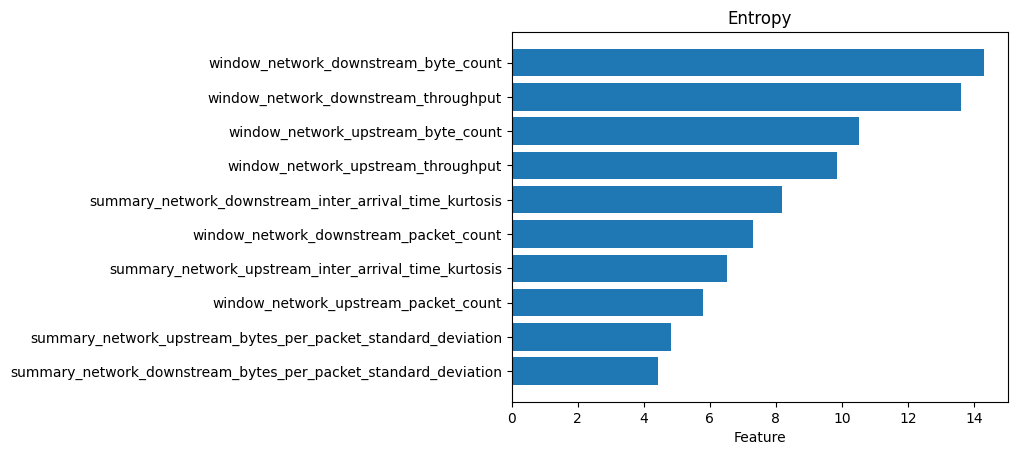

In [234]:
entropy = {}
for stat_name, stat_data in stats.items():
    entropy[stat_name] = scipy.stats.differential_entropy(stat_data)

high_entropy_features = sorted(entropy.items(), key=lambda x: x[1], reverse=True)[:10]
features, entropy = zip(*high_entropy_features)
print(entropy)

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(features))

ax.barh(y_pos, entropy, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature')
ax.set_title('Entropy')


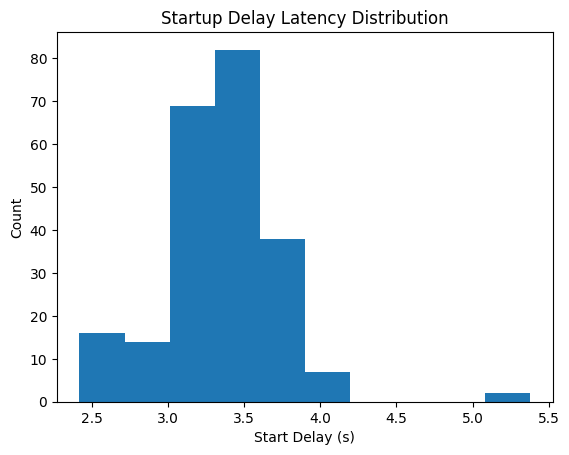

In [235]:
plt.hist(stats['summary_startup_delay'])
plt.title('Startup Delay Latency Distribution')
plt.xlabel('Start Delay (s)')
plt.ylabel('Count')
plt.show()

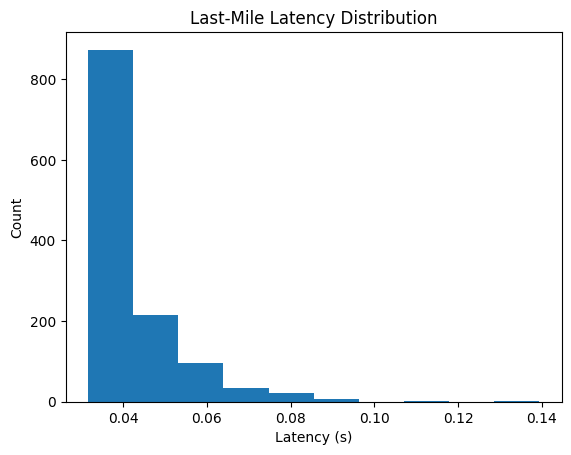

In [236]:
plt.hist(stats['window_ping_mean'])
plt.title('Last-Mile Latency Distribution')
plt.xlabel('Latency (s)')
plt.ylabel('Count')
plt.show()

In [257]:
median_ping = statistics.median(stats['window_ping_mean'])

In [237]:
summary_network = {k:v for k,v in stats.items() if k.startswith('summary_network')}
started = ['started' if delay < 3 else 'not started' for delay in stats['summary_startup_delay']]

In [238]:
import statistics
statistics.median(stats['summary_startup_delay'])

3.356

In [239]:
started

['not started',
 'not started',
 'not started',
 'started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'started',
 'not started',
 'started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'started',
 'not started',
 'not started',
 'not started',
 'not started',
 'started',
 'not started',
 'not started',
 'started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'started',
 'started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not started',
 'not st

In [240]:
# bin data by last_mile_latency
# for each bin train machine learning model to predict resolution
# for each bin calculate feature entropy
# 

In [241]:

X = np.transpose(list(summary_network.values()))
Y = started
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, Y_train)

In [260]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file='tree.dot', 
                      feature_names=list(summary_network.keys()),  
                      class_names=['started', 'not started'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



AttributeError: 'NoneType' object has no attribute 'splitlines'

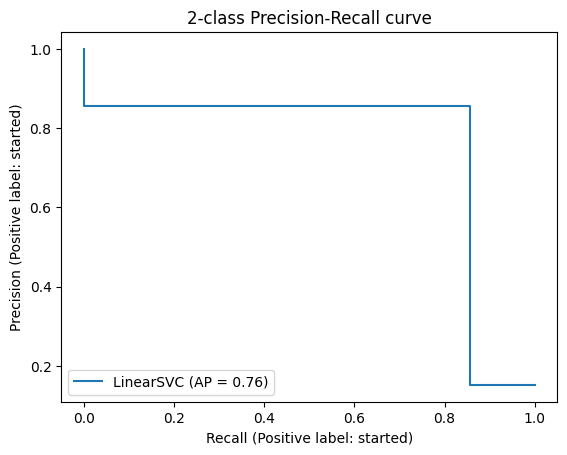

In [243]:
display = sklearn.metrics.PrecisionRecallDisplay.from_estimator(
    clf, X_test, Y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [244]:
Y_pred = clf.predict(X_test)

In [250]:
num_positive = sum([1 if x == y else 0 for x,y in zip(Y_pred, Y_test)])
num_positive / len(Y_test)

0.9565217391304348

In [258]:
sklearn.metrics.f1_score(Y_test, Y_pred, pos_label='not started', average='binary')

0.9743589743589743

In [259]:
sklearn.metrics.f1_score(Y_test, Y_pred, pos_label='started', average='binary')

0.8571428571428571